In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import gymnasium as gym
from TD_helper import *


### On Policy Control Sarsa

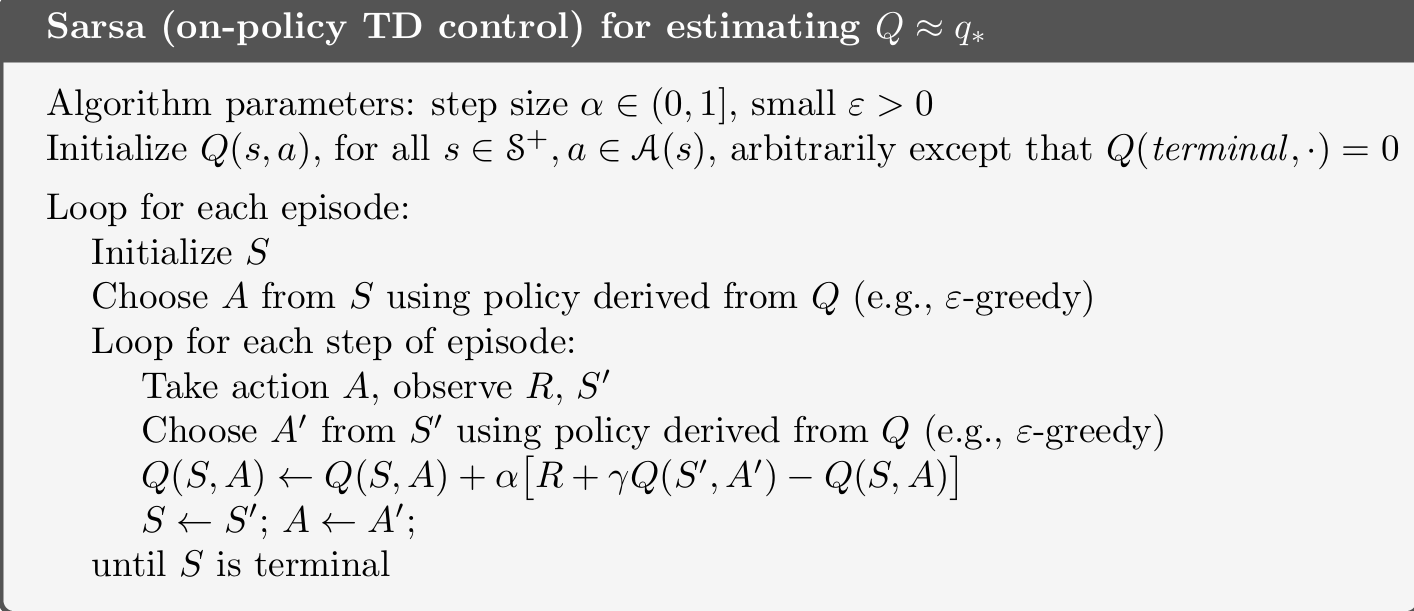

In [43]:
def SARSA(env,n_episodes=100000,alpha=0.5,epsilon=0.1,gamma=1.0,threshold=1e-8):
    nA = env.action_space.n
    Q = np.zeros((env.observation_space.n,nA))
    policy = epsilon_greedy_policy(Q,Q,epsilon,nA)
    for i in range(n_episodes):
        state,_ = env.reset()
        action = np.random.choice(nA,p=policy(state))
        iter = 0
        delta = threshold+1
        while True:
            iter += 1
            delta = 0
            next_state,reward,done,_,_ = env.step(action)
            next_action = np.random.choice(nA,p=policy(next_state))
            Q[state][action] += alpha*(reward+gamma*Q[next_state][next_action]-Q[state][action])
            if done or iter >10000:
                break
            state = next_state
            action = next_action
            # delta = max(delta,np.abs(reward+gamma*Q[next_state][next_action]-Q[state][action]))
    return Q

### Expected Sarsa

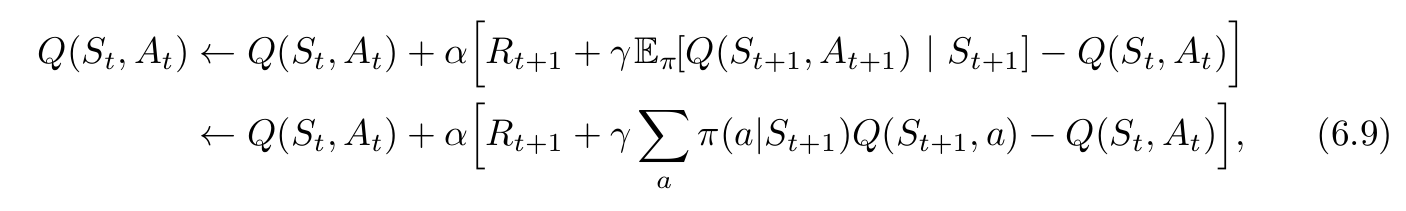

In [44]:
def expected_SARSA(env,n_episodes=100000,alpha=0.5,epsilon=0.1,gamma=1.0,threshold=1e-8):
    nA = env.action_space.n
    Q = np.zeros((env.observation_space.n,nA))
    policy = epsilon_greedy_policy(Q,Q,epsilon,nA)
    for i in range(n_episodes):
        state,_ = env.reset()
        action = np.random.choice(nA,p=policy(state))
        iter = 0
        delta = threshold+1
        while True:
            delta = 0
            iter += 1
            next_state,reward,done,_,_ = env.step(action)
            next_action = np.random.choice(nA,p=policy(next_state))
            expected_Q_next = np.sum([policy(next_state)[a]*Q[next_state][a] for a in range(nA)])
            Q[state][action] += alpha*(reward+gamma*expected_Q_next-Q[state][action])
            if done or iter >10000:
                break
            state = next_state
            action = next_action
            # delta = max(delta,np.abs(reward+gamma*Q[next_state][next_action]-Q[state][action]))
    return Q

### Off Policy Control Q-Learning

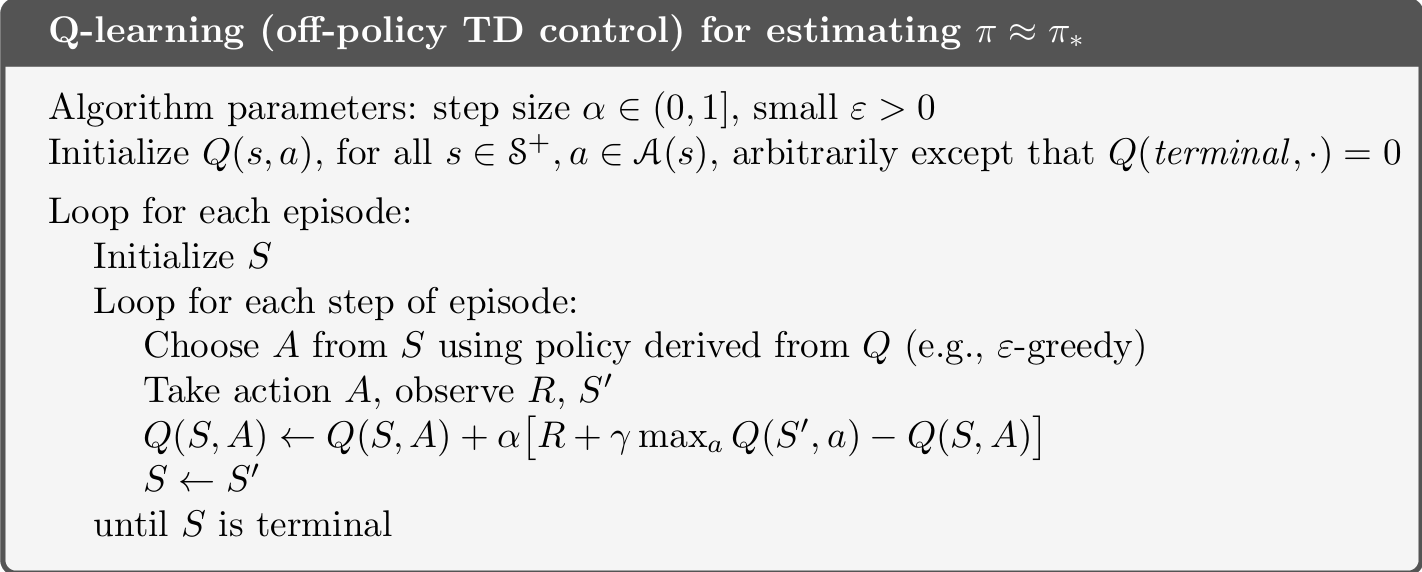

In [45]:
def Q_learning(env,n_episodes=100000,alpha=0.5,epsilon=0.1,gamma=1.0,threshold=1e-8):
    nA = env.action_space.n
    Q = np.zeros((env.observation_space.n,nA))
    policy = epsilon_greedy_policy(Q,Q,epsilon,nA)
    for i in range(n_episodes):
        state,_ = env.reset()
        iter = 0
        delta = threshold+1
        while True:
            iter += 1
            delta = 0
            action = np.random.choice(nA,p=policy(state))
            next_state,reward,done,_,_ = env.step(action)
            Q[state][action] += alpha*(reward+gamma*np.max(Q[next_state])-Q[state][action])
            if done or iter >10000:
                break
            state = next_state
            # delta = max(delta,np.abs(reward+gamma*np.max(Q[next_state])-Q[state][action]))
    return Q

### Double Q-Learning

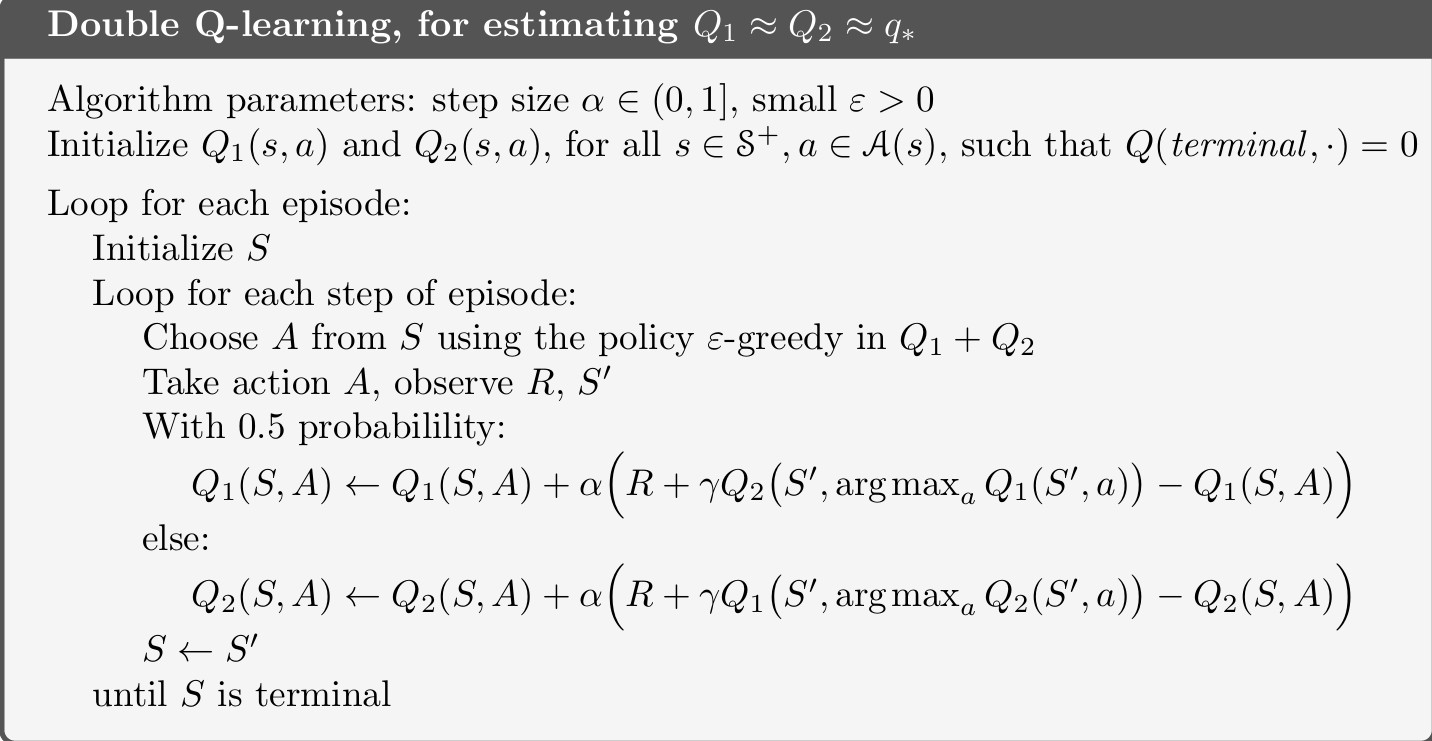

In [52]:
def double_Q_learning(env,n_episodes=100000,alpha=0.5,epsilon=0.1,gamma=1.0,threshold=1e-8):
    nA = env.action_space.n
    Q1 = np.zeros((env.observation_space.n,nA))
    Q2 = np.zeros((env.observation_space.n,nA))
    policy = epsilon_greedy_policy(Q1,Q2,epsilon,nA)
    for i in range(n_episodes):
        state,_ = env.reset()
        iter = 0
        delta = threshold+1
        while True:
            iter += 1
            delta = 0
            action = np.random.choice(nA,p=policy(state))
            next_state,reward,done,_,_ = env.step(action)
            if np.random.rand()<0.5:
                Q1[state][action] += alpha*(reward+gamma*Q2[next_state][np.argmax(Q1[next_state])]-Q1[state][action])
            else:
                Q2[state][action] += alpha*(reward+gamma*Q1[next_state][np.argmax(Q2[next_state])]-Q2[state][action])
            if done or iter >10000:
                break
            state = next_state
            # delta1 = max(delta,np.abs(reward+gamma*np.max(Q2[next_state])-Q1[state][action]))
            # delta2 = max(delta,np.abs(reward+gamma*np.max(Q1[next_state])-Q2[state][action]))
            # delta = max(delta1,delta2)
    return Q1,Q2

In [ ]:
env = gym.make('CliffWalking-v0')
alpha = 0.8
epsilon = 0.1  
gamma = 0.9
n_episodes = 100000

In [48]:
Q_sarsa = SARSA(env,n_episodes=n_episodes,alpha=alpha,epsilon=epsilon,gamma=gamma)
optimal_policy_sarsa = np.argmax(Q_sarsa,axis=1).reshape(4,12)


In [49]:
Q_q_learning = Q_learning(env,n_episodes=n_episodes,alpha=alpha,epsilon=epsilon,gamma=gamma)
optimal_policy_q_learning = np.argmax(Q_q_learning,axis=1).reshape(4,12)


In [50]:
Q_expected_sarsa = expected_SARSA(env,n_episodes=n_episodes,alpha=alpha,epsilon=epsilon,gamma=gamma)
optimal_policy_expected_sarsa = np.argmax(Q_expected_sarsa,axis=1).reshape(4,12)


In [53]:
Q1_double_q_learning,Q2_double_q_learning = double_Q_learning(env,n_episodes=n_episodes,alpha=alpha,epsilon=epsilon,gamma=gamma)
optimal_policy1_double_q_learning = np.argmax(Q1_double_q_learning,axis=1).reshape(4,12)
optimal_policy2_double_q_learning = np.argmax(Q2_double_q_learning,axis=1).reshape(4,12)


(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Double Q-learning Q2'}>)

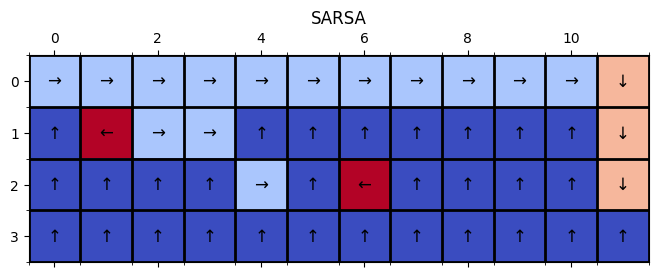

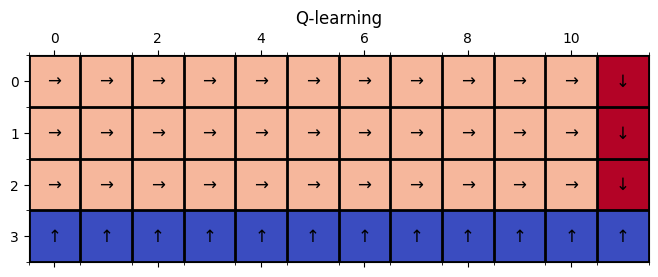

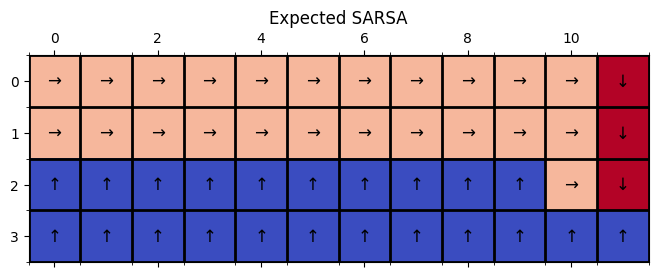

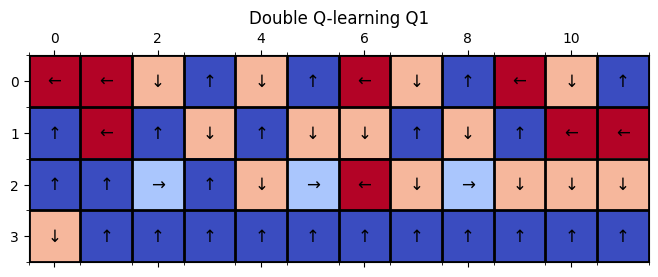

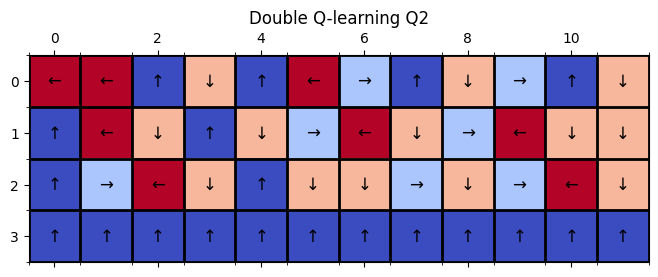

In [ ]:
print_policy(optimal_policy_sarsa,"SARSA")
print_policy(optimal_policy_q_learning,"Q-learning")
print_policy(optimal_policy_expected_sarsa,"Expected SARSA")
print_policy(optimal_policy1_double_q_learning,"Double Q-learning Q1")
print_policy(optimal_policy2_double_q_learning,"Double Q-learning Q2")
